In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import argparse
from sklearn import preprocessing as pre
from sklearn.linear_model import Perceptron
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn.decomposition import PCA

In [42]:
data = pd.read_csv('data_arrhythmia.csv', delimiter=';')

In [43]:
pd.set_option('display.max_columns', None)

In [44]:
data[data.isnull().any(axis=1)].shape 

(0, 280)

In [45]:
data.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,J,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN,AO,AP,AR,AS,AT,AU,AV,AY,AZ,AB',BB,BC,BD,BE,BF,BG,BH,BI,BJ,BK,BL,BM,BN,BO,BP,BR,BS,BT,BU,BV,BY,BZ,CA,CB,CC,CD,CE,Cf,CG,CH,CI,CJ,CK,CL,CM,CN,CO,CP,CR,CS,CT,CU,CV,CY,CZ,DA,DB,DC,DD,DE,DF,DG,DH,DI,DJ,DK,DL,DM,DN,DO,DP,DR,DS,DT,DU,DV,DY,DZ,EA,EB,EC,ED,EF,EG,EH,EI,EJ,EK,EL,EM,EN,EO,EP,ER,ES,ET,EU,EV,EY,EZ,FA,FB,FC,FD,FE,FF,FG,FH,FI,FJ,FK,FL,FM,FN,FO,FP,FR,FS,FT,FU,FV,FY,FZ,GA,GB,GC,GD,GE,GF,GG,GH,GI,GJ,GK,GL,GM,GN,GO,GP,GR,GS,GT,GU,GV,GY,GZ,HA,HB,HC,HD,HE,HF,HG,HH,HI,HJ,HK,HL,HM,HN,HO,HP,HR,HS,HT,HU,HV,HY,HZ,IA,IB,IC,ID,IE,IF,IG,IH,II,IJ,IK,IL,IM,IN,IO,IP,IR,IS,IT,IU,IV,IY,IZ,JA,JB,JC,JD,JE,JF,JG,JH,JI,JJ,JK,JL,JM,JN,JO,JP,JR,JS,JT,JU,JV,JY,JZ,KA,KB,KC,KD,KE,KF,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,0,0,0,60,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,56,36,0,0,32,0,0,0,0,0,0,48,32,0,0,0,56,0,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,40,52,0,0,28,0,0,0,0,0,0,0,48,48,0,0,32,0,0,0,0,0,0,0,52,52,0,0,36,0,0,0,0,0,0,0,52,48,0,0,32,0,0,0,0,0,0,0,56,44,0,0,32,0,0,0,0,0,0,-0.2,0.0,6.1,-1.0,0.0,0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,0,-0.1,1.2,14.1,22.5,0.0,-2.5,0.8,0.0,0.0,0.0,1.0,0.4,-4.8,-2.7,0.1,-6.0,0.0,0.0,0.0,0.0,-0.8,-0.6,-24.0,-29.7,0.0,0.0,2.0,-6.4,0.0,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,24,0,0,0,40,0,0,0,0,0,0,48,0,0,0,0,0,0,0,0,0,0,0,0,44,20,0,0,24,0,0,0,0,0,0,0,60,0,0,0,20,0,0,0,0,0,0,0,24,52,0,0,16,0,0,0,0,0,0,0,32,52,0,0,20,0,0,0,0,0,0,0,44,48,0,0,32,0,0,0,0,0,0,0,48,44,0,0,32,0,0,0,0,0,0,0,48,40,0,0,28,0,0,0,0,0,0,0,48,0,0,0,28,0,0,0,0,0,0,-0.6,0.0,7.2,0.0,0.0,0,0.4,1.5,17.2,26.5,0.0,0.0,5.5,0.0,0.0,0.0,0.1,1.7,17.6,29.5,0.3,-1.6,0.9,0.0,0.0,0.0,-0.3,0.4,-1.5,1.3,0.1,-6.4,0.0,0.0,0.0,0.0,-0.3,-1.6,-15.3,-25.5,-0.3,0.0,4.2,-0.9,0.0,0,0.4,0.7,8.3,12.3,0.2,0.0,2.2,0.0,0.0,0.0,-0.2,0.8,6.6,11.7,0.4,0.0,1.0,-8.8,0.0,0.0,0.5,-0.6,-21.6,-26.8,0.4,0.0,2.6,-7.9,0.0,0.0,0.8,2.0,-16.4,1.2,0.0,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,116,0,0,0,52,0,0,0,0,0,0,52,64,0,0,0,88,0,0,0,0,0,0,0,36,92,0,0,24,0,0,0,0,0,0,0,128,0,0,0,24,0,1,0,0,0,0,0,24,36,76,0,100,0,0,0,0,0,0,0,40,28,60,0,96,0,0,0,0,0,0,0,48,20,56,24,32,0,0,0,0,0,0,0,44,88,0,0,28,0,0,0,0,0,0,0,44,76,0,0,28,0,0,0,0,0,0,0,44,72,0,0,24,0,0,0,0,0,0,1.0,0.0,4.5,-2.8,0.0,0,0.3,2.5,-2.2,19.8,0.8,-0.4,6.4,-1.3,0.0,0.0,0.7,2.7,14.2,37.9,-0.2,-0.6,4.4,0.0,0.0,0.0,0.5,0.2,24.7,26.2,-1.0,-5.3,1.8,0.0,0.0,0.0,-0.5,-2.5,-8.0,-28.5,0.5,0.0,1.7,-2.7,0.0,0,-0.2,1.0,-9.4,-1.2,0.4,0.0,4.9,0.0,0.0,0.0,0.6,1.4,31.3,42.7,-0.8,0.0,0.7,-3.8,6.5,0.0,0.3,-3.3,18.7,-13.6,-0.9,0.0,2.2,-4.1,7.4,0.0,0.5,-2.4,20.9,-2.6,0.0,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,52,48,0,0,56,0,0,0,0,0,0,64,32,0,0,0,72,0,0,0,0,0,0,0,60,12,0,0,44,0,0,0,0,0,0,0,60,44,0,0,32,0,0,0,0,0,0,56,0,0,0,0,0,0,0,0,0,0,0,0,40,44,0,0,20,0,0,0,0,0,0,0,52,40,0,0,32,0,0,0,0,0,0,0,56,48,0,0,36,0,0,0,0,0,0,0,60,48,0,0,36,0,0,0,0,0,0,0,64,40,0,0,40,0,0,0,0

In [46]:
data.shape

(452, 280)

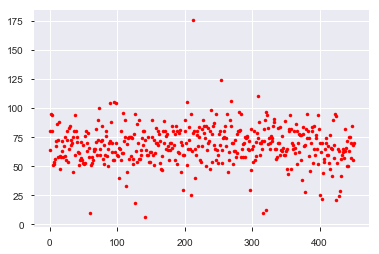

In [47]:
plt.plot(data.weight,'r.')


In [48]:
data_nan = data.replace('?', np.nan)
#data.replace(np.nan, None)
#type(data.iloc[:,14].values)
#data.dropna?
data_nan.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,J,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN,AO,AP,AR,AS,AT,AU,AV,AY,AZ,AB',BB,BC,BD,BE,BF,BG,BH,BI,BJ,BK,BL,BM,BN,BO,BP,BR,BS,BT,BU,BV,BY,BZ,CA,CB,CC,CD,CE,Cf,CG,CH,CI,CJ,CK,CL,CM,CN,CO,CP,CR,CS,CT,CU,CV,CY,CZ,DA,DB,DC,DD,DE,DF,DG,DH,DI,DJ,DK,DL,DM,DN,DO,DP,DR,DS,DT,DU,DV,DY,DZ,EA,EB,EC,ED,EF,EG,EH,EI,EJ,EK,EL,EM,EN,EO,EP,ER,ES,ET,EU,EV,EY,EZ,FA,FB,FC,FD,FE,FF,FG,FH,FI,FJ,FK,FL,FM,FN,FO,FP,FR,FS,FT,FU,FV,FY,FZ,GA,GB,GC,GD,GE,GF,GG,GH,GI,GJ,GK,GL,GM,GN,GO,GP,GR,GS,GT,GU,GV,GY,GZ,HA,HB,HC,HD,HE,HF,HG,HH,HI,HJ,HK,HL,HM,HN,HO,HP,HR,HS,HT,HU,HV,HY,HZ,IA,IB,IC,ID,IE,IF,IG,IH,II,IJ,IK,IL,IM,IN,IO,IP,IR,IS,IT,IU,IV,IY,IZ,JA,JB,JC,JD,JE,JF,JG,JH,JI,JJ,JK,JL,JM,JN,JO,JP,JR,JS,JT,JU,JV,JY,JZ,KA,KB,KC,KD,KE,KF,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,NaN,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,0,0,0,60,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,56,36,0,0,32,0,0,0,0,0,0,48,32,0,0,0,56,0,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,40,52,0,0,28,0,0,0,0,0,0,0,48,48,0,0,32,0,0,0,0,0,0,0,52,52,0,0,36,0,0,0,0,0,0,0,52,48,0,0,32,0,0,0,0,0,0,0,56,44,0,0,32,0,0,0,0,0,0,-0.2,0.0,6.1,-1.0,0.0,0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,0,-0.1,1.2,14.1,22.5,0.0,-2.5,0.8,0.0,0.0,0.0,1.0,0.4,-4.8,-2.7,0.1,-6.0,0.0,0.0,0.0,0.0,-0.8,-0.6,-24.0,-29.7,0.0,0.0,2.0,-6.4,0.0,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,NaN,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,24,0,0,0,40,0,0,0,0,0,0,48,0,0,0,0,0,0,0,0,0,0,0,0,44,20,0,0,24,0,0,0,0,0,0,0,60,0,0,0,20,0,0,0,0,0,0,0,24,52,0,0,16,0,0,0,0,0,0,0,32,52,0,0,20,0,0,0,0,0,0,0,44,48,0,0,32,0,0,0,0,0,0,0,48,44,0,0,32,0,0,0,0,0,0,0,48,40,0,0,28,0,0,0,0,0,0,0,48,0,0,0,28,0,0,0,0,0,0,-0.6,0.0,7.2,0.0,0.0,0,0.4,1.5,17.2,26.5,0.0,0.0,5.5,0.0,0.0,0.0,0.1,1.7,17.6,29.5,0.3,-1.6,0.9,0.0,0.0,0.0,-0.3,0.4,-1.5,1.3,0.1,-6.4,0.0,0.0,0.0,0.0,-0.3,-1.6,-15.3,-25.5,-0.3,0.0,4.2,-0.9,0.0,0,0.4,0.7,8.3,12.3,0.2,0.0,2.2,0.0,0.0,0.0,-0.2,0.8,6.6,11.7,0.4,0.0,1.0,-8.8,0.0,0.0,0.5,-0.6,-21.6,-26.8,0.4,0.0,2.6,-7.9,0.0,0.0,0.8,2.0,-16.4,1.2,0.0,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,116,0,0,0,52,0,0,0,0,0,0,52,64,0,0,0,88,0,0,0,0,0,0,0,36,92,0,0,24,0,0,0,0,0,0,0,128,0,0,0,24,0,1,0,0,0,0,0,24,36,76,0,100,0,0,0,0,0,0,0,40,28,60,0,96,0,0,0,0,0,0,0,48,20,56,24,32,0,0,0,0,0,0,0,44,88,0,0,28,0,0,0,0,0,0,0,44,76,0,0,28,0,0,0,0,0,0,0,44,72,0,0,24,0,0,0,0,0,0,1.0,0.0,4.5,-2.8,0.0,0,0.3,2.5,-2.2,19.8,0.8,-0.4,6.4,-1.3,0.0,0.0,0.7,2.7,14.2,37.9,-0.2,-0.6,4.4,0.0,0.0,0.0,0.5,0.2,24.7,26.2,-1.0,-5.3,1.8,0.0,0.0,0.0,-0.5,-2.5,-8.0,-28.5,0.5,0.0,1.7,-2.7,0.0,0,-0.2,1.0,-9.4,-1.2,0.4,0.0,4.9,0.0,0.0,0.0,0.6,1.4,31.3,42.7,-0.8,0.0,0.7,-3.8,6.5,0.0,0.3,-3.3,18.7,-13.6,-0.9,0.0,2.2,-4.1,7.4,0.0,0.5,-2.4,20.9,-2.6,0.0,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,NaN,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,52,48,0,0,56,0,0,0,0,0,0,64,32,0,0,0,72,0,0,0,0,0,0,0,60,12,0,0,44,0,0,0,0,0,0,0,60,44,0,0,32,0,0,0,0,0,0,56,0,0,0,0,0,0,0,0,0,0,0,0,40,44,0,0,20,0,0,0,0,0,0,0,52,40,0,0,32,0,0,0,0,0,0,0,56,48,0,0,36,0,0,0,0,0,0,0,60,48,0,0,36,0,0,0,0,0,0,0,64,40,0,0,40,0

In [49]:
data_bersih = data_nan.dropna(axis=1)
data_bersih.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN,AO,AP,AR,AS,AT,AU,AV,AY,AZ,AB',BB,BC,BD,BE,BF,BG,BH,BI,BJ,BK,BL,BM,BN,BO,BP,BR,BS,BT,BU,BV,BY,BZ,CA,CB,CC,CD,CE,Cf,CG,CH,CI,CJ,CK,CL,CM,CN,CO,CP,CR,CS,CT,CU,CV,CY,CZ,DA,DB,DC,DD,DE,DF,DG,DH,DI,DJ,DK,DL,DM,DN,DO,DP,DR,DS,DT,DU,DV,DY,DZ,EA,EB,EC,ED,EF,EG,EH,EI,EJ,EK,EL,EM,EN,EO,EP,ER,ES,ET,EU,EV,EY,EZ,FA,FB,FC,FD,FE,FF,FG,FH,FI,FJ,FK,FL,FM,FN,FO,FP,FR,FS,FT,FU,FV,FY,FZ,GA,GB,GC,GD,GE,GF,GG,GH,GI,GJ,GK,GL,GM,GN,GO,GP,GR,GS,GT,GU,GV,GY,GZ,HA,HB,HC,HD,HE,HF,HG,HH,HI,HJ,HK,HL,HM,HN,HO,HP,HR,HS,HT,HU,HV,HY,HZ,IA,IB,IC,ID,IE,IF,IG,IH,II,IJ,IK,IL,IM,IN,IO,IP,IR,IS,IT,IU,IV,IY,IZ,JA,JB,JC,JD,JE,JF,JG,JH,JI,JJ,JK,JL,JM,JN,JO,JP,JR,JS,JT,JU,JV,JY,JZ,KA,KB,KC,KD,KE,KF,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KR,KS,KT,KU,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,0,0,0,60,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,56,36,0,0,32,0,0,0,0,0,0,48,32,0,0,0,56,0,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,40,52,0,0,28,0,0,0,0,0,0,0,48,48,0,0,32,0,0,0,0,0,0,0,52,52,0,0,36,0,0,0,0,0,0,0,52,48,0,0,32,0,0,0,0,0,0,0,56,44,0,0,32,0,0,0,0,0,0,-0.2,0.0,6.1,-1.0,0.0,0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,0,-0.1,1.2,14.1,22.5,0.0,-2.5,0.8,0.0,0.0,0.0,1.0,0.4,-4.8,-2.7,0.1,-6.0,0.0,0.0,0.0,0.0,-0.8,-0.6,-24.0,-29.7,0.0,0.0,2.0,-6.4,0.0,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,24,0,0,0,40,0,0,0,0,0,0,48,0,0,0,0,0,0,0,0,0,0,0,0,44,20,0,0,24,0,0,0,0,0,0,0,60,0,0,0,20,0,0,0,0,0,0,0,24,52,0,0,16,0,0,0,0,0,0,0,32,52,0,0,20,0,0,0,0,0,0,0,44,48,0,0,32,0,0,0,0,0,0,0,48,44,0,0,32,0,0,0,0,0,0,0,48,40,0,0,28,0,0,0,0,0,0,0,48,0,0,0,28,0,0,0,0,0,0,-0.6,0.0,7.2,0.0,0.0,0,0.4,1.5,17.2,26.5,0.0,0.0,5.5,0.0,0.0,0.0,0.1,1.7,17.6,29.5,0.3,-1.6,0.9,0.0,0.0,0.0,-0.3,0.4,-1.5,1.3,0.1,-6.4,0.0,0.0,0.0,0.0,-0.3,-1.6,-15.3,-25.5,-0.3,0.0,4.2,-0.9,0.0,0,0.4,0.7,8.3,12.3,0.2,0.0,2.2,0.0,0.0,0.0,-0.2,0.8,6.6,11.7,0.4,0.0,1.0,-8.8,0.0,0.0,0.5,-0.6,-21.6,-26.8,0.4,0.0,2.6,-7.9,0.0,0.0,0.8,2.0,-16.4,1.2,0.0,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,116,0,0,0,52,0,0,0,0,0,0,52,64,0,0,0,88,0,0,0,0,0,0,0,36,92,0,0,24,0,0,0,0,0,0,0,128,0,0,0,24,0,1,0,0,0,0,0,24,36,76,0,100,0,0,0,0,0,0,0,40,28,60,0,96,0,0,0,0,0,0,0,48,20,56,24,32,0,0,0,0,0,0,0,44,88,0,0,28,0,0,0,0,0,0,0,44,76,0,0,28,0,0,0,0,0,0,0,44,72,0,0,24,0,0,0,0,0,0,1.0,0.0,4.5,-2.8,0.0,0,0.3,2.5,-2.2,19.8,0.8,-0.4,6.4,-1.3,0.0,0.0,0.7,2.7,14.2,37.9,-0.2,-0.6,4.4,0.0,0.0,0.0,0.5,0.2,24.7,26.2,-1.0,-5.3,1.8,0.0,0.0,0.0,-0.5,-2.5,-8.0,-28.5,0.5,0.0,1.7,-2.7,0.0,0,-0.2,1.0,-9.4,-1.2,0.4,0.0,4.9,0.0,0.0,0.0,0.6,1.4,31.3,42.7,-0.8,0.0,0.7,-3.8,6.5,0.0,0.3,-3.3,18.7,-13.6,-0.9,0.0,2.2,-4.1,7.4,0.0,0.5,-2.4,20.9,-2.6,0.0,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,52,48,0,0,56,0,0,0,0,0,0,64,32,0,0,0,72,0,0,0,0,0,0,0,60,12,0,0,44,0,0,0,0,0,0,0,60,44,0,0,32,0,0,0,0,0,0,56,0,0,0,0,0,0,0,0,0,0,0,0,40,44,0,0,20,0,0,0,0,0,0,0,52,40,0,0,32,0,0,0,0,0,0,0,56,48,0,0,36,0,0,0,0,0,0,0,60,48,0,0,36,0,0,0,0,0,0,0,64,40,0,0,40,0,0,0,0,0,0,0.9,0.0,7.8,-0.7,0.0,0,1.1,1.9,27.3,45.1,0.1,0.0,9.1,-2.6,0.0,0.0,0.4,1.5,2

In [50]:
#data_bersih.to_csv('data_bersih.csv')

In [51]:
data_bersih.shape

(452, 275)

In [52]:
data_fitur = data_bersih.drop('diagnosis', axis=1).values

In [53]:
data_label = data_bersih.iloc[:,-1].values
#data_label

In [54]:
(trainX, testX, trainY, testY) = train_test_split(data_fitur, 
                data_label, random_state=3, test_size=0.25)

In [55]:
trainY.shape

(339,)

In [56]:
testY.shape

(113,)

In [57]:
models = {'knn': KNeighborsClassifier(n_neighbors=1),
         'naive_bayes': GaussianNB(),
         'logit': LogisticRegression(solver='lbfgs', multi_class='auto'),
         'svm': SVC(kernel='rbf', gamma='auto'),
         'decision_tree': DecisionTreeClassifier(),
         'random_forest': RandomForestClassifier(n_estimators=100),
          'Perceptron': Perceptron(),
         'mlp': MLPClassifier()}

In [58]:
print('[INFO] loading data...')
print('[INFO] using "{}" model'.format('naive_bayes'))
model = models['naive_bayes'] #untuk memanggil keys didalam dict models
model.fit(trainX, trainY)

#make predictions on our data and show a classification report
print('[INFO] evaluating...')
predictions = model.predict(testX)
print(classification_report(testY, predictions))

[INFO] loading data...
[INFO] using "naive_bayes" model
[INFO] evaluating...
              precision    recall  f1-score   support

           1       0.43      0.10      0.16        59
           2       0.10      0.10      0.10        10
           3       0.67      0.40      0.50         5
           4       0.09      0.25      0.13         4
           5       0.00      0.00      0.00         2
           6       0.05      0.40      0.10         5
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.50      0.29      0.37        17
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.04      0.14      0.07         7

    accuracy                           0.16       113
   macro avg       0.16      0.14      0.12       113
weighted avg       0.35      0.16      0.19       113



C:\Users\Andre\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Andre\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Andre\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [59]:
print('[INFO] loading data...')
print('[INFO] using "{}" model'.format('random_forest'))
model = models['random_forest'] #untuk memanggil keys didalam dict models
model.fit(trainX, trainY)

#make predictions on our data and show a classification report
print('[INFO] evaluating...')
predictions = model.predict(testX)
print(classification_report(testY, predictions))

[INFO] loading data...
[INFO] using "random_forest" model
[INFO] evaluating...
              precision    recall  f1-score   support

           1       0.69      0.95      0.80        59
           2       0.54      0.70      0.61        10
           3       0.67      0.80      0.73         5
           4       1.00      0.75      0.86         4
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         1
          10       0.78      0.41      0.54        17
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         7

    accuracy                           0.69       113
   macro avg       0.39      0.38      0.38       113
weighted avg       0.60      0.69      0.62       113



C:\Users\Andre\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Andre\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Andre\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [60]:
np.random.seed(5)

In [61]:
pca =PCA(38)

In [62]:
pComponents = pca.fit_transform(data_fitur)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
#pComponents.n_components_

Explained variation per principal component: [0.16885041 0.11671256 0.10246538 0.06914536 0.05704606 0.05133178
 0.04123803 0.03672126 0.03495763 0.02726777 0.02435104 0.02134127
 0.02032102 0.01892798 0.01527553 0.01378538 0.01121498 0.00993402
 0.00901454 0.00886036 0.00810953 0.00749857 0.00740543 0.00712935
 0.00658459 0.00614079 0.00575269 0.00540801 0.00514785 0.00489374
 0.00437338 0.00424988 0.00386155 0.00371137 0.0036306  0.00343834
 0.00320181 0.00290798]


In [63]:
pComponents.shape, data_label.shape

((452, 38), (452,))

In [64]:
(train_X, test_X, train_Y, test_Y) = train_test_split(pComponents, 
                data_label, random_state=3, test_size=0.25)

In [65]:
print('[INFO] loading data after reducing with pca...')
print('[INFO] using "{}" model'.format('logit'))
model = models['logit'] #untuk memanggil keys didalam dict models
model.fit(train_X, train_Y)

#make predictions on our data and show a classification report
print('[INFO] evaluating...')
predictions = model.predict(test_X)
print(classification_report(test_Y, predictions))

[INFO] loading data after reducing with pca...
[INFO] using "logit" model
[INFO] evaluating...
              precision    recall  f1-score   support

           1       0.77      0.56      0.65        59
           2       0.50      0.30      0.37        10
           3       0.33      0.60      0.43         5
           4       0.60      0.75      0.67         4
           5       0.06      0.50      0.11         2
           6       0.12      0.20      0.15         5
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       0.50      1.00      0.67         1
          10       0.78      0.41      0.54        17
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.14      0.14      0.14         7

    accuracy                           0.47       113
   macro avg       0.29      0.34      0.29       113
weighted avg       0.62      0.47      

C:\Users\Andre\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Andre\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Andre\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Andre\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [66]:
eval_models = []
for c in models:
  #print(c)
  #columns.append(c)
  model = models[c]
  model.fit(train_X, train_Y)
  Y_pred = model.predict(test_X)
  evaluation = classification_report(test_Y, Y_pred, output_dict = True)
  eval_model = []
  for i in range(5):
    if i == 0:
      eval_model.append(c)
    if i == 1:
      eval_model.append(round(float(evaluation['weighted avg']['precision'])*100, 2))
    if i == 2:
      eval_model.append(round(float(evaluation['weighted avg']['recall'])*100, 2))
    if i == 3:
      eval_model.append(round(float(evaluation['weighted avg']['f1-score'])*100, 2))
    if i == 4:
      eval_model.append(round(float(evaluation['accuracy'])*100, 2))
  eval_models.append(eval_model)
eval_to_df = np.array(eval_models)
df_90_10_pca = pd.DataFrame(eval_to_df, columns=['model', 'precision', 'recall', 'f1_score', 'accuracy'])
df_90_10_pca

C:\Users\Andre\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Andre\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Andre\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Andre\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Andre\Anaconda3\lib\sit

,model,precision,recall,f1_score,accuracy
0,knn,54.64,54.87,52.88,54.87
1,naive_bayes,56.88,63.72,59.07,63.72
2,logit,61.79,46.9,51.81,46.9
3,svm,27.26,52.21,35.82,52.21
4,decision_tree,49.78,47.79,48.56,47.79
5,random_forest,59.35,64.6,56.49,64.6
6,Perceptron,56.73,39.82,43.97,39.82
7,mlp,55.52,51.33,52.49,51.33


In [67]:
eval_models = []
for c in models:
  #print(c)
  #columns.append(c)
  model = models[c]
  model.fit(trainX, trainY)
  Y_pred = model.predict(testX)
  evaluation = classification_report(testY, Y_pred, output_dict = True)
  eval_model = []
  for i in range(5):
    if i == 0:
      eval_model.append(c)
    if i == 1:
      eval_model.append(round(float(evaluation['weighted avg']['precision'])*100, 2))
    if i == 2:
      eval_model.append(round(float(evaluation['weighted avg']['recall'])*100, 2))
    if i == 3:
      eval_model.append(round(float(evaluation['weighted avg']['f1-score'])*100, 2))
    if i == 4:
      eval_model.append(round(float(evaluation['accuracy'])*100, 2))
  eval_models.append(eval_model)
eval_to_df = np.array(eval_models)
df_90_10 = pd.DataFrame(eval_to_df, columns=['model', 'precision', 'recall', 'f1_score', 'accuracy'])
df_90_10

C:\Users\Andre\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Andre\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Andre\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Andre\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Andre\Anaconda3\lib\sit

,model,precision,recall,f1_score,accuracy
0,knn,58.61,54.87,51.88,54.87
1,naive_bayes,34.56,15.93,18.56,15.93
2,logit,69.12,67.26,66.04,67.26
3,svm,27.26,52.21,35.82,52.21
4,decision_tree,59.98,60.18,59.14,60.18
5,random_forest,59.17,68.14,61.73,68.14
6,Perceptron,63.55,33.63,40.43,33.63
7,mlp,63.81,64.6,63.25,64.6


In [68]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


lda = LinearDiscriminantAnalysis(n_components = 10)
X_r2 = lda.fit(data_fitur, data_label).transform(data_fitur)

#percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
     % str(lda.explained_variance_ratio_))

explained variance ratio (first two components): [0.54016853 0.14089224 0.09329079 0.04655537 0.04344555 0.03123504
 0.0255632  0.02099639 0.01811981 0.01626194]


C:\Users\Andre\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [69]:
n_groups = 4

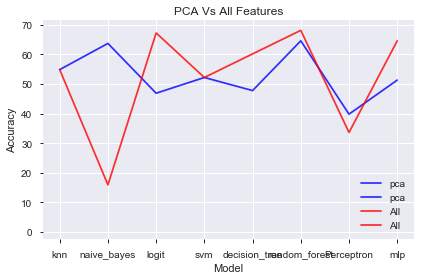

In [70]:
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width= 0.9
opacity = 0.8
#plt.subplot(1,2,1)
rects1 = plt.plot(df_90_10_pca['model'].values, df_90_10_pca['accuracy'].values.astype(np.float), bar_width, alpha=opacity, color='b', label ='pca')
#plt.subplot(1,1,2)
rects2 = plt.plot(df_90_10['model'].values, df_90_10['accuracy'].values.astype(np.float), bar_width, alpha=opacity, color='r', label ='All')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('PCA Vs All Features')
#plt.xticks(('A', 'B', 'C', 'D'))
plt.legend()
plt.tight_layout()

In [71]:
z = df_90_10['accuracy'].values.astype(np.float)